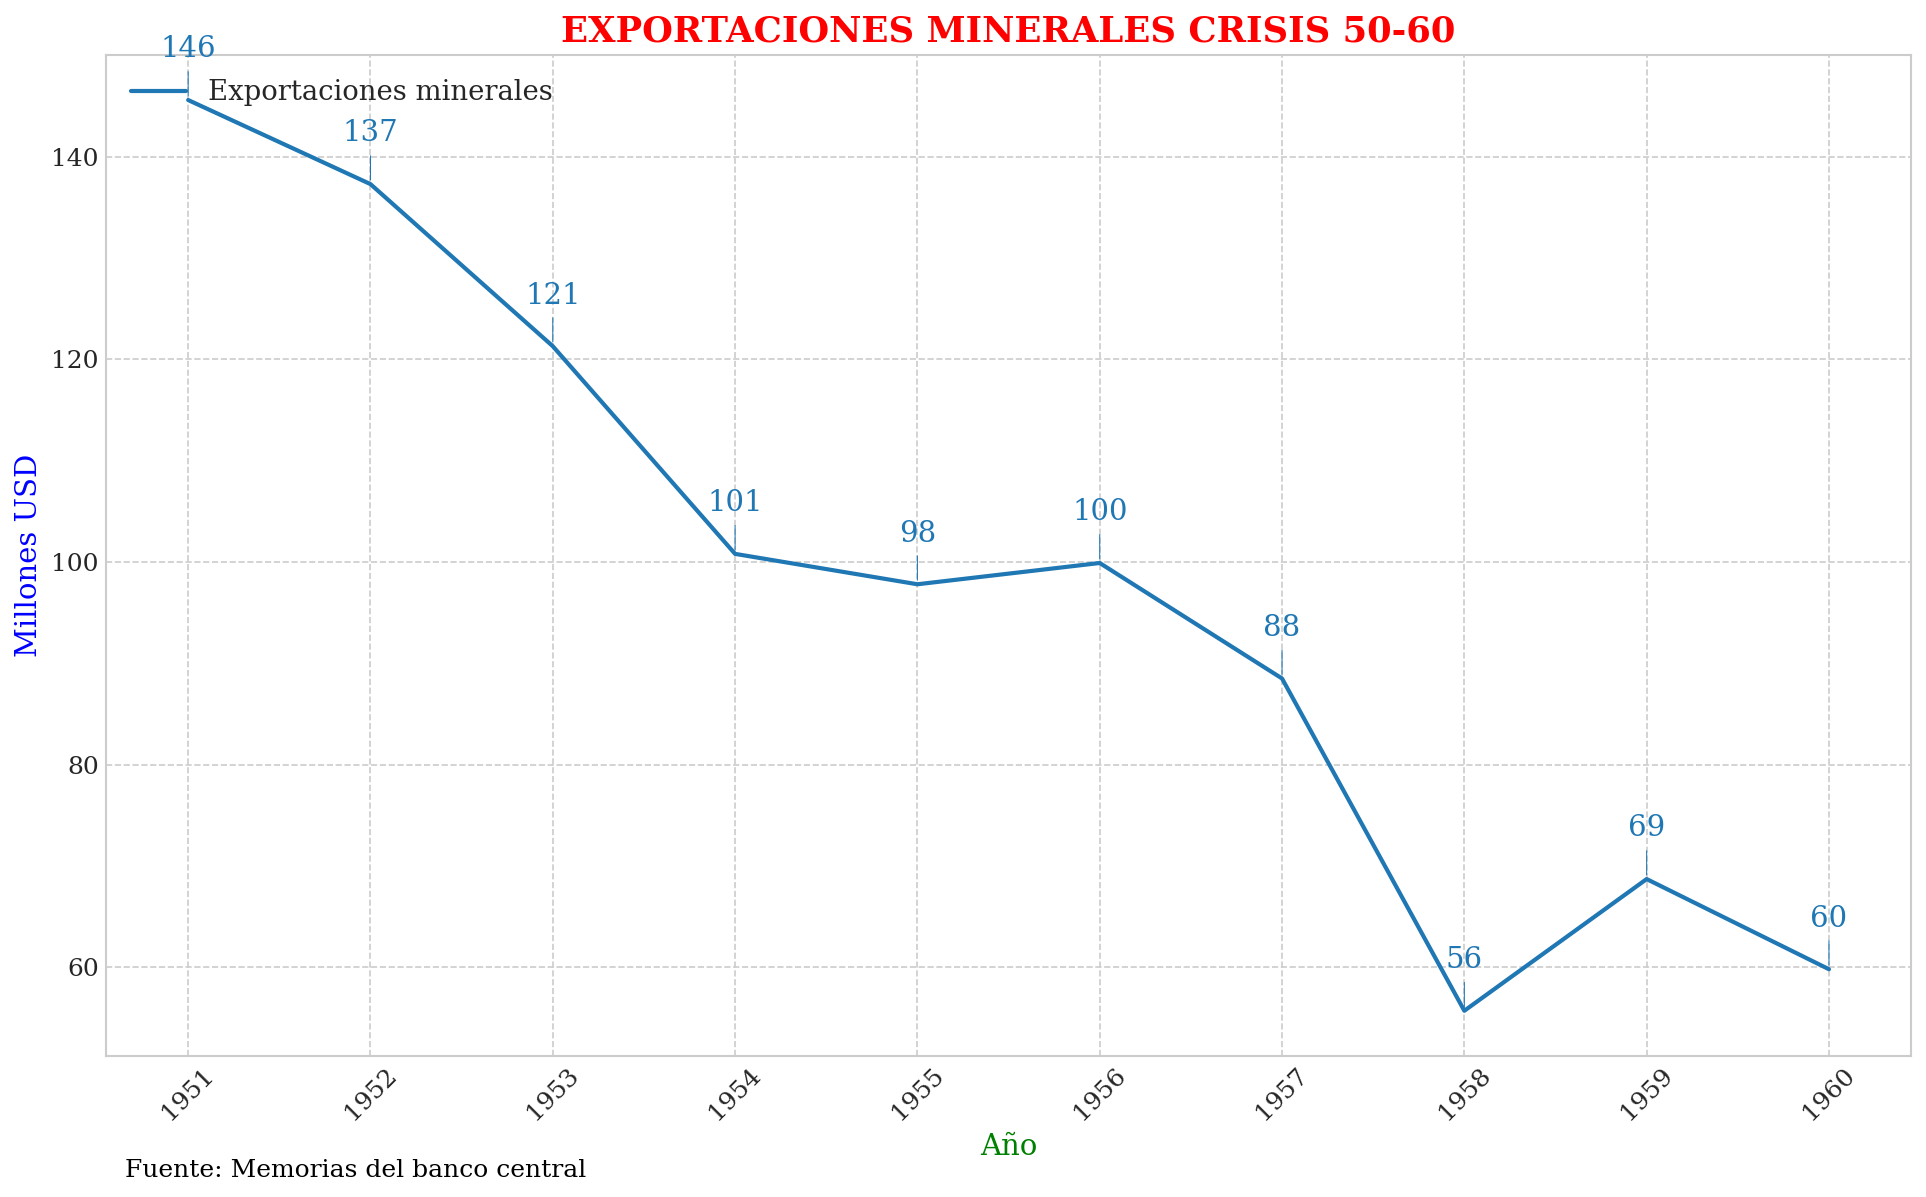

In [1]:
# ─────────────────────────────────────────────────────────────────────
# Importaciones
# ─────────────────────────────────────────────────────────────────────
import sys, os
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

# Si aún no instalaste el paquete en editable, descomenta la siguiente línea:
# sys.path.append(os.path.abspath('../'))

from func_auxiliares.graficos_utils import (
    get_df, set_style, init_base_plot,
    add_year_value_annotations
)
from func_auxiliares.config import (
    DB_PATH, ASSETS_DIR,
    PERIODOS_PARA_CRISIS
)

# ─────────────────────────────────────────────────────────────────────
# Configuración general
# ─────────────────────────────────────────────────────────────────────
output_dir = ASSETS_DIR / "crisis" / "exportaciones_minerales"
output_dir.mkdir(parents=True, exist_ok=True)

set_style()

# ─────────────────────────────────────────────────────────────────────
# Carga de datos
# ─────────────────────────────────────────────────────────────────────
# Datos manuales para exportaciones minerales (1951–1960)
years = list(range(1951, 1961))
valores_exportaciones_minerales = [
    145.6,  # 1951
    137.3,  # 1952
    121.3,  # 1953
    100.8,  # 1954
     97.8,  # 1955
     99.9,  # 1956
     88.5,  # 1957
     55.7,  # 1958
     68.7,  # 1959
     59.8   # 1960
]
df = pd.DataFrame(
    {"exportaciones_minerales": valores_exportaciones_minerales},
    index=years
)
df.index.name = "año"

# ─────────────────────────────────────────────────────────────────────
# Componentes y parámetros de graficado
# ─────────────────────────────────────────────────────────────────────
componentes      = [("exportaciones_minerales", "Exportaciones minerales")]
cols_componentes = [col for col, _ in componentes]
colors           = {"exportaciones_minerales": "#1f77b4"}

# Desplazamientos de anotaciones para “exportaciones_minerales”
annotation_offsets = {
    "exportaciones_minerales": {
        1951: (0, 5),  1952: (0, 5),  1953: (0, 5),
        1954: (0, 5),  1955: (0, 5),  1956: (0, 5),
        1957: (0, 5),  1958: (0, 5),  1959: (0, 5),
        1960: (0, 5),
    }
}

# ─────────────────────────────────────────────────────────────────────
# Generación de gráficas por subperíodo
# ─────────────────────────────────────────────────────────────────────
for nombre, (ini, fin) in PERIODOS_PARA_CRISIS.items():
    sub = df.loc[ini:fin]
    if sub.empty:
        continue
    if len(sub) < 3:
        print(f"Subperíodo {nombre} tiene menos de 3 datos, omitiendo.")
        continue

    years_to_annot = list(sub.index)
    fig, ax = init_base_plot(
        sub,
        series=componentes,
        colors=colors,
        title=f"EXPORTACIONES MINERALES {nombre.upper()}",
        xlabel="Año",
        ylabel="Millones USD",
        source_text="Fuente: Memorias del banco central"
    )

    add_year_value_annotations(
        ax,
        sub,
        years_to_annot,
        cols_componentes,
        annotation_offsets,
        colors,
        arrow_lw=0.5,
    )

    fig.savefig(output_dir / f"exportaciones_minerales_{nombre}.png")
    plt.show()
    plt.close(fig)
